In [1]:
import pandas as pd # Let's import pandas with pd

### 1. Data Manipulation

#### * a. Read the provided CSV file ‘data.csv’

In [2]:
calories =pd.read_csv("../data.csv")

#### * Show the basic statistical description about the data.


In [3]:
calories.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
calories.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


#### Check if the data has null values.
i. Replace the null values with the mean

In [5]:
calories.fillna(calories.mean(), inplace=True)

In [6]:
len(calories)

169

#### Select at least two columns and aggregate the data using: min, max, count, mean.

In [7]:
aggregated_data = calories[['Maxpulse','Calories']].agg(['min', 'max', 'count', 'mean'])

In [8]:
aggregated_data


,Maxpulse,Calories
min,100.000000,50.300000
max,184.000000,1860.400000
count,169.000000,169.000000
mean,134.047337,375.790244


#### Filter the dataframe to select the rows with calories values between 500 and 1000.

In [9]:
filtered_df = calories[(calories['Calories'] >= 500) & (calories['Calories'] <= 1000)]

In [10]:
filtered_df

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


#### Filter the dataframe to select the rows with calories values > 500 and pulse < 100

In [11]:
filtered_df_1 = calories[(calories['Calories'] > 500) & (calories['Pulse'] < 100)]

In [12]:
filtered_df_1

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


#### Create a new “df_modified” dataframe that contains all the columns from df except for
“Maxpulse”

In [13]:
df_modified = calories.drop(columns=['Maxpulse'])

In [14]:
df_modified


,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


#### Delete the “Maxpulse” column from the main df dataframe

In [15]:
calories.drop(columns=['Maxpulse'], inplace=True)

In [16]:
calories

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


#### Convert the datatype of Calories column to int datatype.

In [17]:
calories['Calories'] = calories['Calories'].astype(int)

In [18]:
calories

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


<Axes: title={'center': 'Scatter Plot: Duration vs Calories'}, xlabel='Duration', ylabel='Calories'>

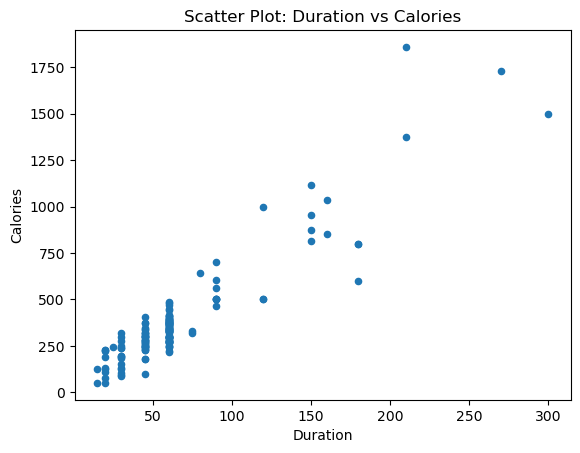

In [19]:
%matplotlib inline
calories.plot.scatter(x='Duration', y='Calories', title='Scatter Plot: Duration vs Calories')

###  2. Linear Regression


#### Import the given “Salary_Data.csv”

In [20]:
datasets =pd.read_csv("../Salary_Data.csv")

In [21]:
X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
# Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the training set
# Train and predict the model.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set result ￼

Y_Pred = regressor.predict(X_Test)

In [22]:
X_Train, X_Test, Y_Train, Y_Test

(array([[ 2.9],
        [ 5.1],
        [ 3.2],
        [ 4.5],
        [ 8.2],
        [ 6.8],
        [ 1.3],
        [10.5],
        [ 3. ],
        [ 2.2],
        [ 5.9],
        [ 6. ],
        [ 3.7],
        [ 3.2],
        [ 9. ],
        [ 2. ],
        [ 1.1],
        [ 7.1],
        [ 4.9],
        [ 4. ]]),
 array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7],
        [ 9.6],
        [ 4. ],
        [ 5.3],
        [ 7.9]]),
 array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
        121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
        105582.,  43525.,  39343.,  98273.,  67938.,  56957.]),
 array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
         55794.,  83088., 101302.]))

In [23]:
Y_Pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

#### Calculate the mean_squared error

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_Test, Y_Pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 21026037.329511296


#### Visualize both train and test data using scatter plot

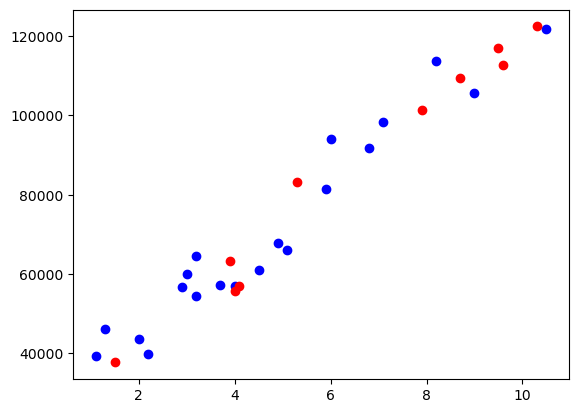

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
# Visualize the training data
plt.scatter(X_Train, Y_Train, label='Training Data', color='blue')

# Visualize the testing data
plt.scatter(X_Test, Y_Test, label='Testing Data', color='red')
